# Principal Component Analysis with Cancer Data

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [30]:
df_cancer=pd.read_csv("breast-cancer-wisconsin-data.csv")
df_cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [32]:
print(df_cancer.dtypes)
print(df_cancer.shape)

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object
(699, 11)


In [33]:
df_cancer.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [34]:
df_cancer.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [35]:
df_cancer[df_cancer["Bare Nuclei"]=="?"]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [36]:
df_cancer["Bare Nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
# Replacing "?" with top values

In [37]:
df_cancer["Bare Nuclei"]=df_cancer["Bare Nuclei"].replace("?",1)

In [38]:
df_cancer["Bare Nuclei"]=df_cancer["Bare Nuclei"].astype("int32")

In [39]:
df_cancer["Bare Nuclei"].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable

In [40]:
df_cancer.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


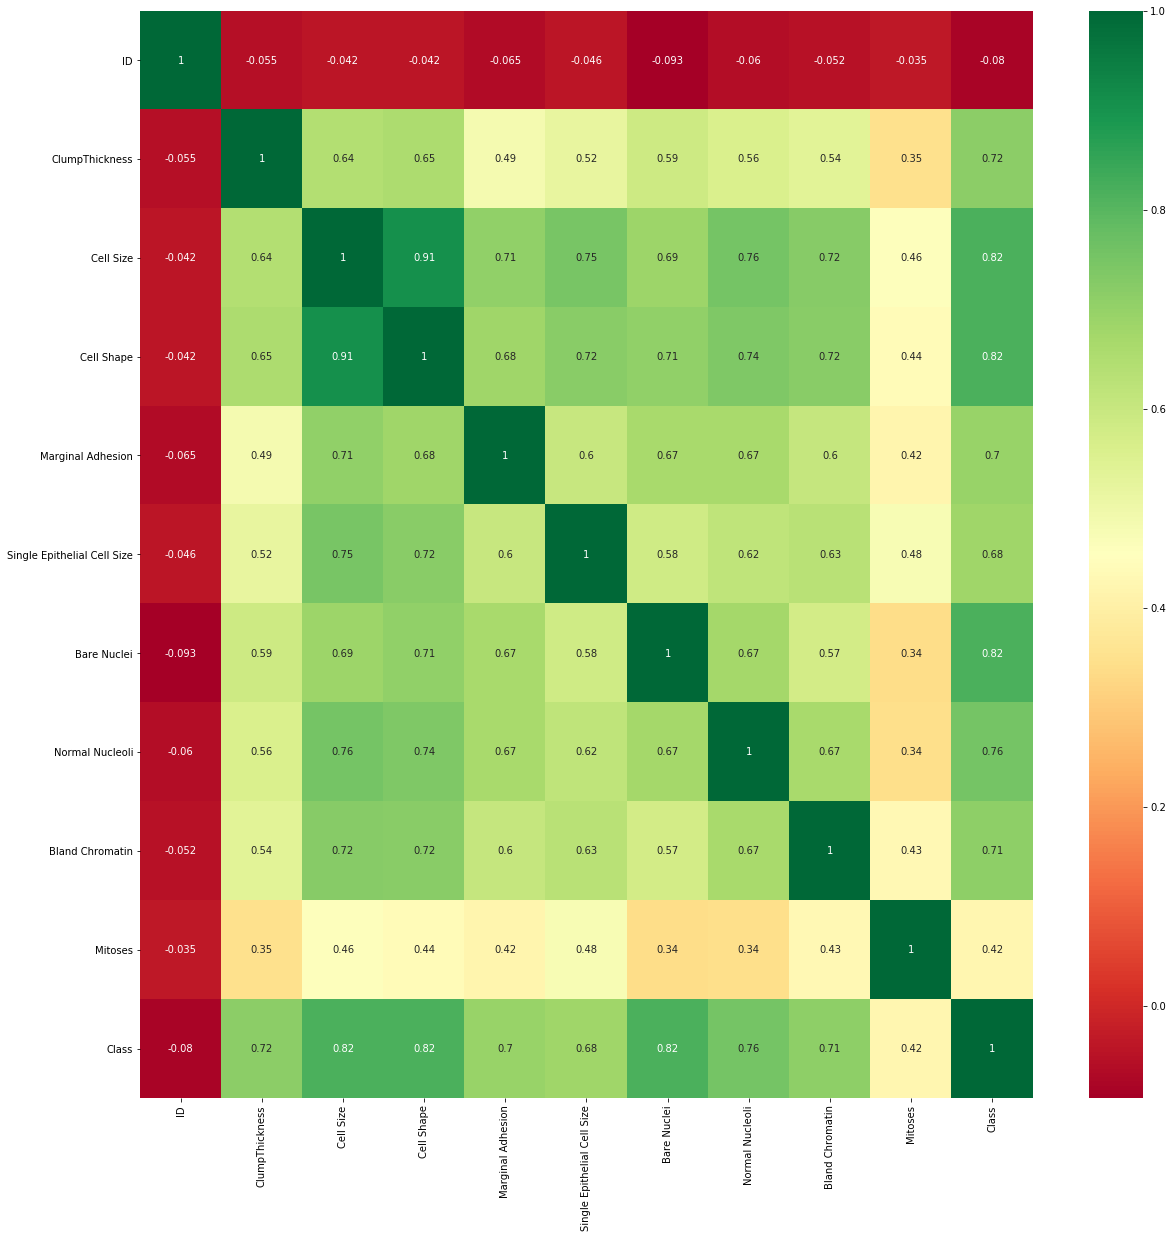

In [41]:
import seaborn as sns

corrmat = df_cancer.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_cancer[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [1]:
#Let us check for pair plots

C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


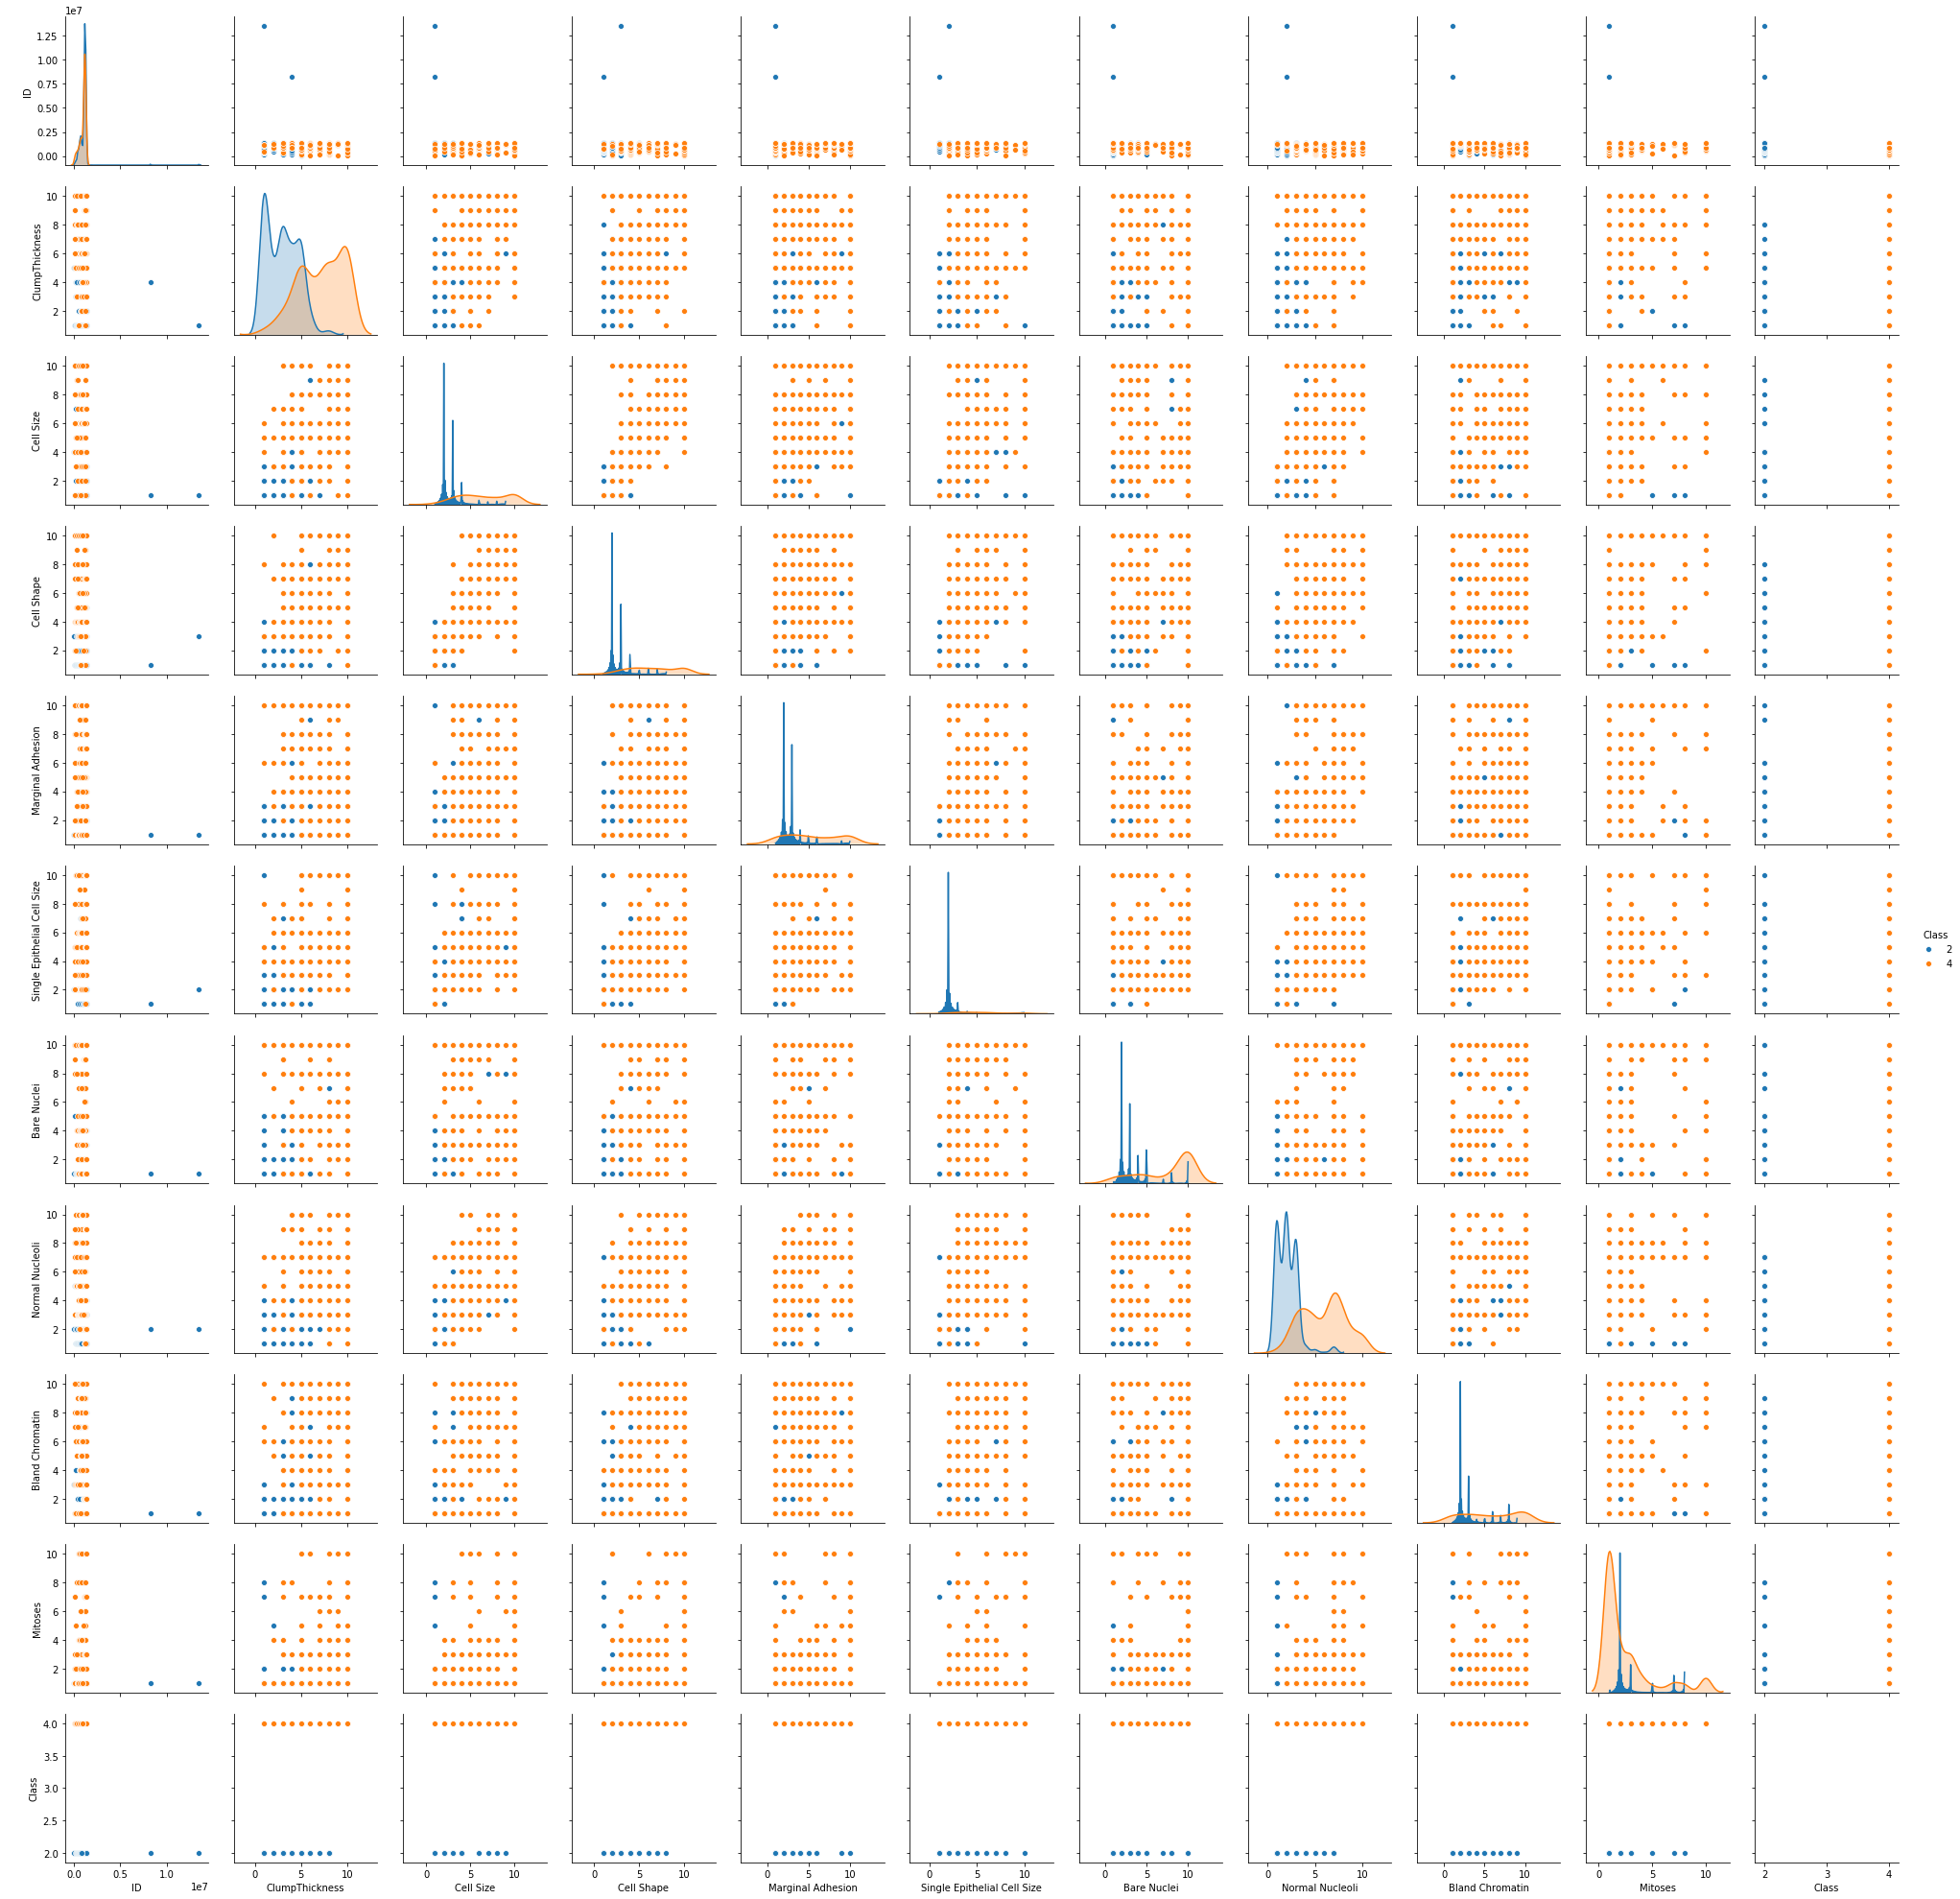

In [42]:
sns.pairplot(df_cancer,hue="Class")

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
# Dropping the ID column as it has no significance. Setting the ID as Index value before dropping the column`

In [43]:
df_cancer.index=df_cancer["ID"]

In [44]:
df_cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,,,,,,,,,,,
1000025,1000025,5,1,1,1,2,1,3,1,1,2
1002945,1002945,5,4,4,5,7,10,3,2,1,2
1015425,1015425,3,1,1,1,2,2,3,1,1,2
1016277,1016277,6,8,8,1,3,4,3,7,1,2
1017023,1017023,4,1,1,3,2,1,3,1,1,2
1017122,1017122,8,10,10,8,7,10,9,7,1,4
1018099,1018099,1,1,1,1,2,10,3,1,1,2
1018561,1018561,2,1,2,1,2,1,3,1,1,2
1033078,1033078,2,1,1,1,2,1,1,1,5,2


In [45]:
df_cancer=df_cancer.drop("ID",axis=1)

In [46]:
df_cancer.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2


In [ ]:
# Performing univariate analysis with Target variable

In [47]:
pd.crosstab(df_cancer["Mitoses"],df_cancer["Class"])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


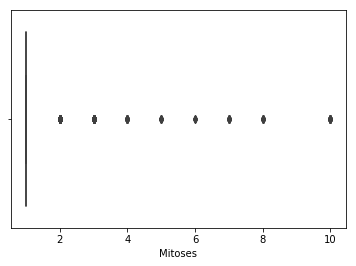

In [48]:
sns.boxplot(df_cancer["Mitoses"])

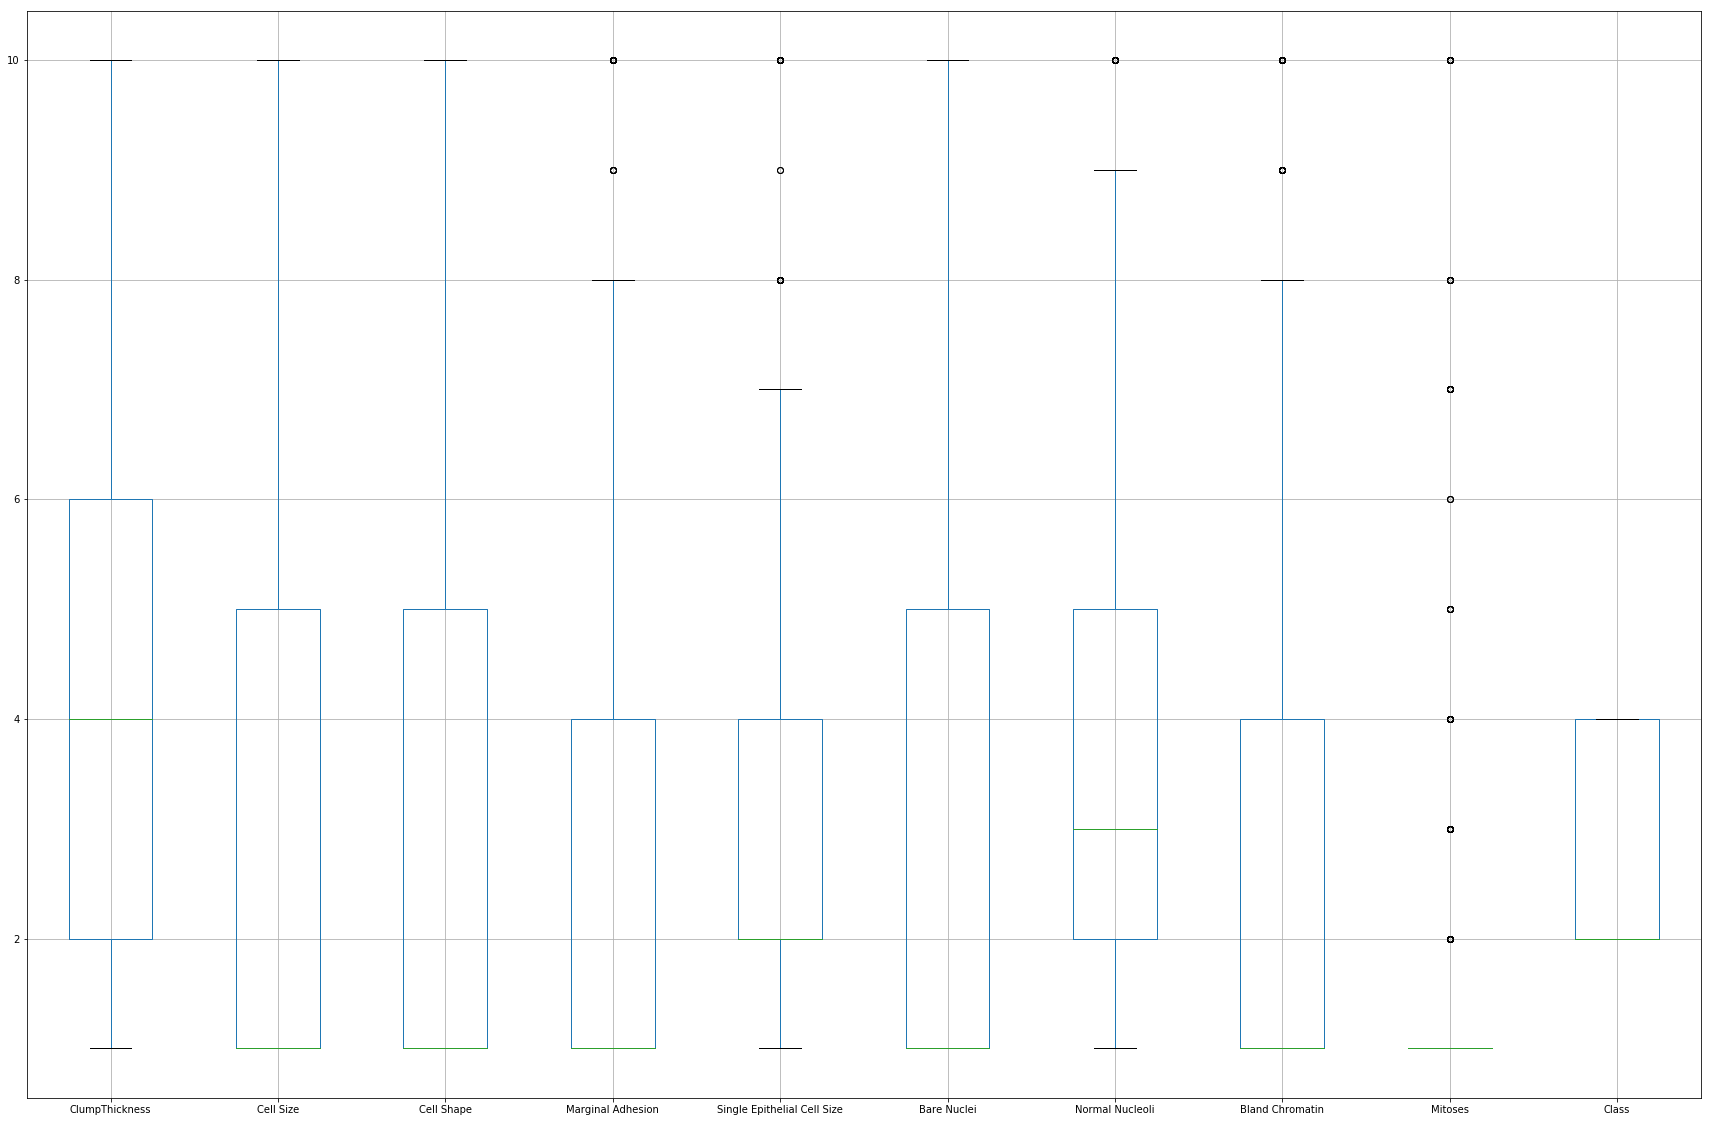

In [49]:
# Verify the outliers for the model
df_cancer.boxplot(figsize=(30,20))

In [50]:
df_cancer["Mitoses"]=np.where(df_cancer["Mitoses"]>=4,3,df_cancer["Mitoses"])

In [0]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix


In [51]:
X=df_cancer.drop("Class",axis=1)
Y=df_cancer["Class"]

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_Std=sc.fit_transform(X)

C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
df_cancer_covariance=np.cov(X_Std.T)

In [55]:
df_cancer_covariance

array([[1.00143266, 0.64583645, 0.65552689, 0.48705303, 0.52256381,
        0.5908535 , 0.5592282 , 0.53660222, 0.42662567],
       [0.64583645, 1.00143266, 0.90818117, 0.70659267, 0.75287621,
        0.68765657, 0.75680368, 0.72390044, 0.51272252],
       [0.65552689, 0.90818117, 1.00143266, 0.68405782, 0.72069948,
        0.70848734, 0.73700282, 0.72047704, 0.48335106],
       [0.48705303, 0.70659267, 0.68405782, 1.00143266, 0.60045809,
        0.66792658, 0.66767051, 0.60421681, 0.47398946],
       [0.52256381, 0.75287621, 0.72069948, 0.60045809, 1.00143266,
        0.5845377 , 0.61698451, 0.62978166, 0.49557419],
       [0.5908535 , 0.68765657, 0.70848734, 0.66792658, 0.5845377 ,
        1.00143266, 0.67518063, 0.5756016 , 0.4537019 ],
       [0.5592282 , 0.75680368, 0.73700282, 0.66767051, 0.61698451,
        0.67518063, 1.00143266, 0.66683179, 0.39969991],
       [0.53660222, 0.72390044, 0.72047704, 0.60421681, 0.62978166,
        0.5756016 , 0.66683179, 1.00143266, 0.48706424],


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [56]:
eigvals, eigvecs = np.linalg.eig(df_cancer_covariance)

In [57]:
print(eigvals)
print(eigvecs)

[5.97585976 0.67963764 0.54311444 0.08846307 0.48366991 0.38528369
 0.26232508 0.30827188 0.28626851]
[[-0.30186813  0.04024398 -0.87220642  0.00511861 -0.02233423 -0.03009028
  -0.24202011  0.2932491  -0.02264522]
 [-0.37808365  0.10055055  0.03603235  0.73478647 -0.19979011  0.11522661
   0.4567451   0.07987382  0.19376192]
 [-0.3740461   0.14455721 -0.02722297 -0.66539715 -0.17337406  0.08532344
   0.59093207  0.01629984  0.09430388]
 [-0.33064613  0.05119878  0.37162486 -0.04189218  0.48542791  0.03831798
  -0.11506276  0.69535874 -0.11966662]
 [-0.33258251 -0.07362985  0.19795793 -0.06292367 -0.43729099  0.64611151
  -0.45014557 -0.09208384 -0.14500629]
 [-0.33345366  0.13289863 -0.100029    0.07729081  0.57356117  0.14287941
   0.06772727 -0.57771538 -0.40919184]
 [-0.34311155  0.29220567  0.13923158 -0.06381574  0.10136573 -0.27693476
  -0.38616818 -0.26468421  0.68357952]
 [-0.33372142 -0.01173143  0.17463113  0.02479279 -0.38238787 -0.67497502
  -0.1073507  -0.04789803 -0.4916

# Q8 Find variance and cumulative variance by each eigen vector

In [71]:
tot = sum(eigvals)
var_exp = [(i / tot)*100 for i in sorted(eigvals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_var_exp)

[66.30345112070131, 7.540726010796786, 6.025971738626552, 5.366421802578414, 4.274805576079861, 3.4203429050433054, 3.1762107679948546, 2.910553247883323, 0.9815168302955847]
[ 66.30345112  73.84417713  79.87014887  85.23657067  89.51137625
  92.93171915  96.10792992  99.01848317 100.        ]


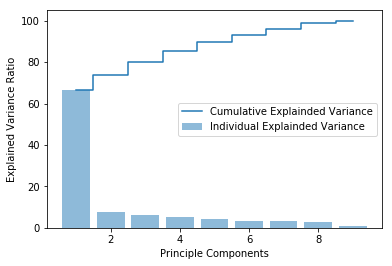

In [72]:
plt.bar(range(1,10),var_exp,alpha=0.5,align='center',label='Individual Explainded Variance')
plt.step(range(1,10),cum_var_exp,where='mid',label='Cumulative Explainded Variance')
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principle Components")
plt.legend(loc="best")
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=7)
pca.fit(X_Std)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [63]:
X_pca = pca.transform(X_Std)

In [64]:
X_pca.shape


(699, 7)

In [65]:
X_pca

array([[-1.47935318e+00, -1.06230354e-01, -5.90085074e-01, ...,
        -1.28758315e-01,  1.18689881e-01,  3.15441337e-01],
       [ 1.42406536e+00, -5.83205833e-01,  1.94645483e-01, ...,
         1.71860327e+00, -4.71807988e-01, -1.07273220e+00],
       [-1.60179030e+00, -1.14343932e-01,  2.24301095e-03, ...,
        -6.78934268e-02, -2.49371077e-01,  2.18480465e-01],
       ...,
       [ 4.00819984e+00,  2.95603149e-02,  8.78010783e-01, ...,
        -6.47197543e-01, -4.63781370e-01,  7.90553583e-01],
       [ 2.21792118e+00, -1.51708111e+00,  8.40193286e-01, ...,
        -1.16075570e+00, -4.02977603e-01,  1.55470031e+00],
       [ 2.60940923e+00, -1.64350887e+00,  8.99470804e-01, ...,
        -3.15993044e-01, -3.18141474e-01,  1.71994124e+00]])

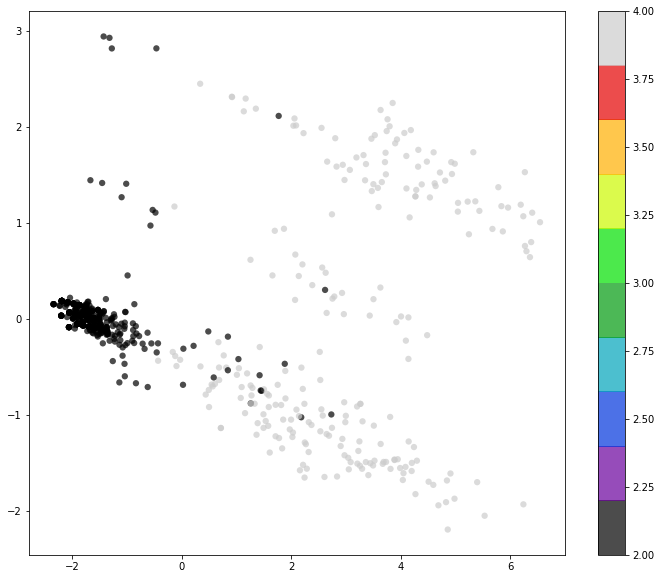

In [66]:
plt.figure(figsize=(12,10))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()



plt.show()

# Q10 Find correlation between components and features

In [67]:
pca.components_

array([[ 0.30186813,  0.37808365,  0.3740461 ,  0.33064613,  0.33258251,
         0.33345366,  0.34311155,  0.33372142,  0.25650157],
       [-0.04024398, -0.10055055, -0.14455721, -0.05119878,  0.07362985,
        -0.13289863, -0.29220567,  0.01173143,  0.92528197],
       [-0.87220642,  0.03603235, -0.02722297,  0.37162486,  0.19795793,
        -0.100029  ,  0.13923158,  0.17463113, -0.00607412],
       [-0.02233423, -0.19979011, -0.17337406,  0.48542791, -0.43729099,
         0.57356117,  0.10136573, -0.38238787,  0.13112952],
       [-0.03009028,  0.11522661,  0.08532344,  0.03831798,  0.64611151,
         0.14287941, -0.27693476, -0.67497502, -0.08312818],
       [ 0.2932491 ,  0.07987382,  0.01629984,  0.69535874, -0.09208384,
        -0.57771538, -0.26468421, -0.04789803, -0.09617299],
       [-0.02264522,  0.19376192,  0.09430388, -0.11966662, -0.14500629,
        -0.40919184,  0.68357952, -0.49168233,  0.20305892]])

In [68]:
pd.DataFrame(pca.components_,columns=X.columns)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.301868,0.378084,0.374046,0.330646,0.332583,0.333454,0.343112,0.333721,0.256502
1,-0.040244,-0.100551,-0.144557,-0.051199,0.073630,-0.132899,-0.292206,0.011731,0.925282
2,-0.872206,0.036032,-0.027223,0.371625,0.197958,-0.100029,0.139232,0.174631,-0.006074
3,-0.022334,-0.199790,-0.173374,0.485428,-0.437291,0.573561,0.101366,-0.382388,0.131130
4,-0.030090,0.115227,0.085323,0.038318,0.646112,0.142879,-0.276935,-0.674975,-0.083128
5,0.293249,0.079874,0.016300,0.695359,-0.092084,-0.577715,-0.264684,-0.047898,-0.096173
6,-0.022645,0.193762,0.094304,-0.119667,-0.145006,-0.409192,0.683580,-0.491682,0.203059


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [3]:
df_jokes=pd.read_csv("jokes.csv")

In [4]:
df_jokes.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [5]:
df_ratings=df_jokes.iloc[0:200,1:]

In [6]:
df_ratings.shape

(200, 100)

In [7]:
df_ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [9]:
cols=range(0,100)

In [10]:
df_ratings.columns=cols

In [12]:
df_ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [13]:
df_ratings.replace(99,0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()


StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
df_ratings_diff=pd.DataFrame(sc.fit_transform(df_ratings))

In [22]:
df_ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.834017,-0.263026,-0.942683,-1.066125,-1.380394,-0.883915,-1.785253,0.877475,-1.031886,-0.593006,...,-1.397875,0.740224,0.773171,0.772626,0.740124,0.740442,-1.393526,0.707782,0.789401,0.708077
1,-0.569744,-0.499046,-0.603680,-0.816405,-0.432101,-0.909860,-0.160595,-1.083559,-0.667499,-0.207319,...,-1.397875,-1.460133,-1.361107,-1.157292,-1.383886,-1.416016,-1.210820,-1.403709,-1.358070,-1.416331
2,1.538226,2.081847,1.356697,1.069553,1.672963,-0.486467,1.578074,1.929134,1.171165,2.269575,...,0.700489,0.740224,0.773171,-1.131458,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
3,1.538226,-0.274463,1.356697,1.069553,0.339079,-0.511294,-0.532913,1.298139,1.171165,-0.410922,...,0.700489,0.740224,0.773171,-1.312507,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
4,-0.471585,-0.371678,-0.826508,-1.010920,0.257903,-0.658016,1.223570,0.968206,-0.857649,-0.303603,...,-1.346169,-1.237240,-1.263088,-1.213830,-1.257118,-1.337339,-1.209769,-1.270805,-1.230868,-1.404834


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [27]:
diff_ratings_mean=df_ratings_diff.mean(axis=0)

In [28]:
diff_ratings_mean.head()

0   -4.940492e-17
1   -6.217249e-17
2   -6.106227e-17
3    2.536860e-16
4   -8.881784e-18
dtype: float64

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [29]:
diff_ratings_mean.sort_values(ascending=False).head(10)

87    2.831069e-16
84    2.642331e-16
3     2.536860e-16
95    2.342571e-16
72    2.153833e-16
70    1.743050e-16
93    1.676437e-16
83    1.665335e-16
96    1.476597e-16
63    1.426637e-16
dtype: float64